In [1]:
%matplotlib inline


import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs
from numba import njit
import sectionate
from glob import glob
import momlevel
from xhistogram.xarray import histogram
import julian
import datetime
import cftime

import warnings
warnings.filterwarnings('ignore')

In [2]:
run_dict = {
 'odiv255odiv293mini2_rec_2004_2022' : {
                             'color_identifier' : 'blue',
                             'legend_label' : 'CM4X-p125',
                             },
 'odiv2mini2catodiv2ssp585_rec_2004_2022' :   {
                             'legend_label' : "CM4.0 ",
                             'color_identifier' : 'red',
                             }, 
 'odiv231odiv232_rec3_2004_2022' :   {
                             'color_identifier' : 'green',
                             'legend_label' : 'CM4X-p25',
                             },
        }

## Read netcdf data and plot Overturning figures:

In [3]:
plt.rcParams.update({"font.size":12})
figsize=[6.5,4.0]
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
degC= "$^{\circ}$C"


In [4]:
# Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

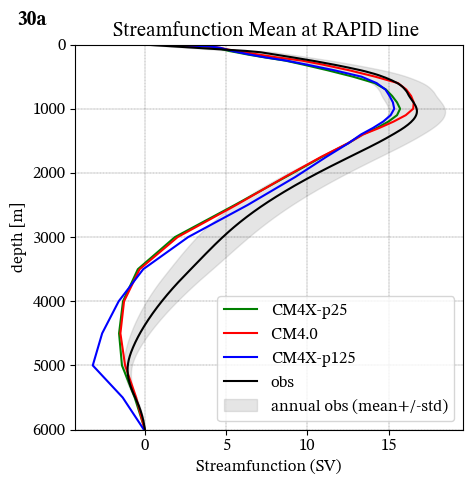

In [5]:
fig = plt.figure(figsize=(5,5))
start_dates=[]
end_dates=[]
#historical_runs=['odiv2','odiv231','odiv255']
#historical_runs=['odiv231odiv232mini_rec_2014_2022','odiv2odiv2ssp585_mini_rec_2014_2022','odiv255odiv293mini_rec_2014_2022']
#historical_runs=['odiv231odiv232mini_rec_2014_2020','odiv2odiv2ssp585_mini_rec_2014_2020','odiv255odiv293mini_rec_2014_2020']
historical_runs=['odiv231odiv232_rec3_2004_2022','odiv2mini2catodiv2ssp585_rec_2004_2022','odiv255odiv293mini2_rec_2004_2022']
loopnum=0
for keys in historical_runs:
    moc_z_resid=xr.open_dataset("/home/Bill.Hurlin/Matthew.Thomas/python_code/python_scripts/CM4hires_figures/AMOC_RAPID_data/"+"moc_z_resid_"+keys+".nc")
    moc_z_resid_sf=(moc_z_resid.vmo.mean('time')/1035/1e6).plot(y='z_l',ylim=[6000,0],label=run_dict[keys]['legend_label'],color=run_dict[keys]['color_identifier'])
    loopnum+=1
RAPID_streamfunction=xr.open_dataset("/home/Matthew.Thomas/python_code/python_scripts/CM4hires_figures/AMOC_RAPID_data/RAPID_streamfunction.nc")
RAPID_transports=xr.open_dataset('/home/Matthew.Thomas/archive/data/RAPID/moc_transports.nc',decode_times=True)
RAPID_transports_annual=xr.open_dataset("/home/Matthew.Thomas/python_code/python_scripts/CM4hires_figures/AMOC_RAPID_data/RAPID_transports_annual.nc")
RAPID_streamfunction.stream_function_mar.mean('time').plot(label='obs',y='depth',ylim=[6000,0],color='k')
RAPID_transports_annual=RAPID_transports.resample(time="Y").mean().moc_mar_hc10
RAPID_streamfunction_annual=RAPID_streamfunction.resample(time="Y").mean().stream_function_mar
RAPID_streamfunction['year_bin']=xr.where(RAPID_streamfunction['time.month']<=3,RAPID_streamfunction['time.year']-1, RAPID_streamfunction['time.year'])
RAPID_streamfunction_annual_mean =RAPID_streamfunction.groupby('year_bin').mean().stream_function_mar
plt.fill_betweenx(RAPID_streamfunction.stream_function_mar.depth.values,(RAPID_streamfunction_annual_mean.mean('year_bin')-RAPID_streamfunction_annual_mean.std('year_bin')),(RAPID_streamfunction_annual_mean.mean('year_bin')+RAPID_streamfunction_annual_mean.std('year_bin')), alpha=0.2, color='gray',label='annual obs (mean+/-std)')
plt.grid(color='black', linestyle='--', linewidth=.2)
plt.legend(loc="lower right")
plt.xlabel('Streamfunction (SV)')
plt.title('Streamfunction Mean at RAPID line ')
text=plt.annotate('30a', xy=(-.15, 1.09),xycoords='axes fraction', ha='left', va='top',fontsize=14, color='black',fontweight='bold')

In [20]:
#end of notebook